In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_csv("P:/python/50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Here 'Profit' is output variable. And remaining four are input variables.

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Here the output is continuous. And the input is both continuous and categorical.

In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data[data.duplicated()].shape

(0, 5)

Here there is no missing values and no duplicates.

In [6]:
data1 = data.rename({'R&D Spend':'rds', 'Marketing Spend':'market_s'}, axis = 1)

In [7]:
data1.head()

,rds,Administration,market_s,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
x = data1.iloc[:,:4]
y = data1.iloc[:,4:]

{'whiskers': [<matplotlib.lines.Line2D at 0x158c0c499d0>,
 'caps': [<matplotlib.lines.Line2D at 0x158c0c570d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x158c0c49670>],
 'medians': [<matplotlib.lines.Line2D at 0x158c0c57790>],
 'fliers': [<matplotlib.lines.Line2D at 0x158c0c57af0>],
 'means': []}

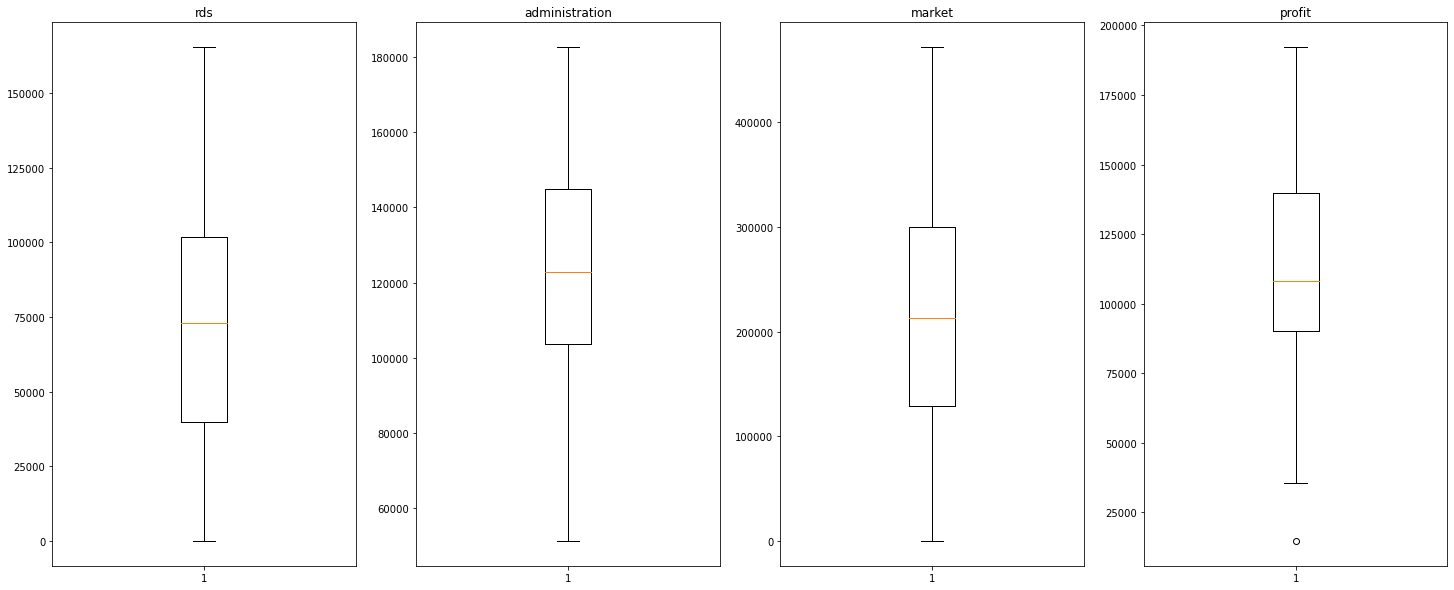

In [9]:
plt.subplots(figsize=(25,10))
plt.subplot(1,4,1)
plt.title('rds')
plt.boxplot(data1.rds)
plt.subplot(1,4,2)
plt.title('administration')
plt.boxplot(data1.Administration)
plt.subplot(1,4,3)
plt.title('market')
plt.boxplot(data1.market_s)
plt.subplot(1,4,4)
plt.title('profit')
plt.boxplot(data1.Profit)

In profit 1 outlier is there.

In [10]:
np.where(data1['Profit']<25000)

(array([49], dtype=int64),)

In [11]:
data1 = data1.drop(labels = 49, axis = 0)

{'whiskers': [<matplotlib.lines.Line2D at 0x158c0d31670>,
 'caps': [<matplotlib.lines.Line2D at 0x158c0d31d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x158c0d31310>],
 'medians': [<matplotlib.lines.Line2D at 0x158c0d3c430>],
 'fliers': [<matplotlib.lines.Line2D at 0x158c0d3c790>],
 'means': []}

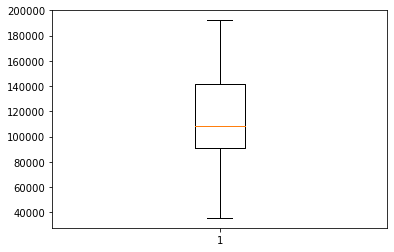

In [12]:
plt.boxplot(data1.Profit)

Here i have only one outlier and i have removed it.

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:title={'center':'profit'}, xlabel='Profit', ylabel='Density'>

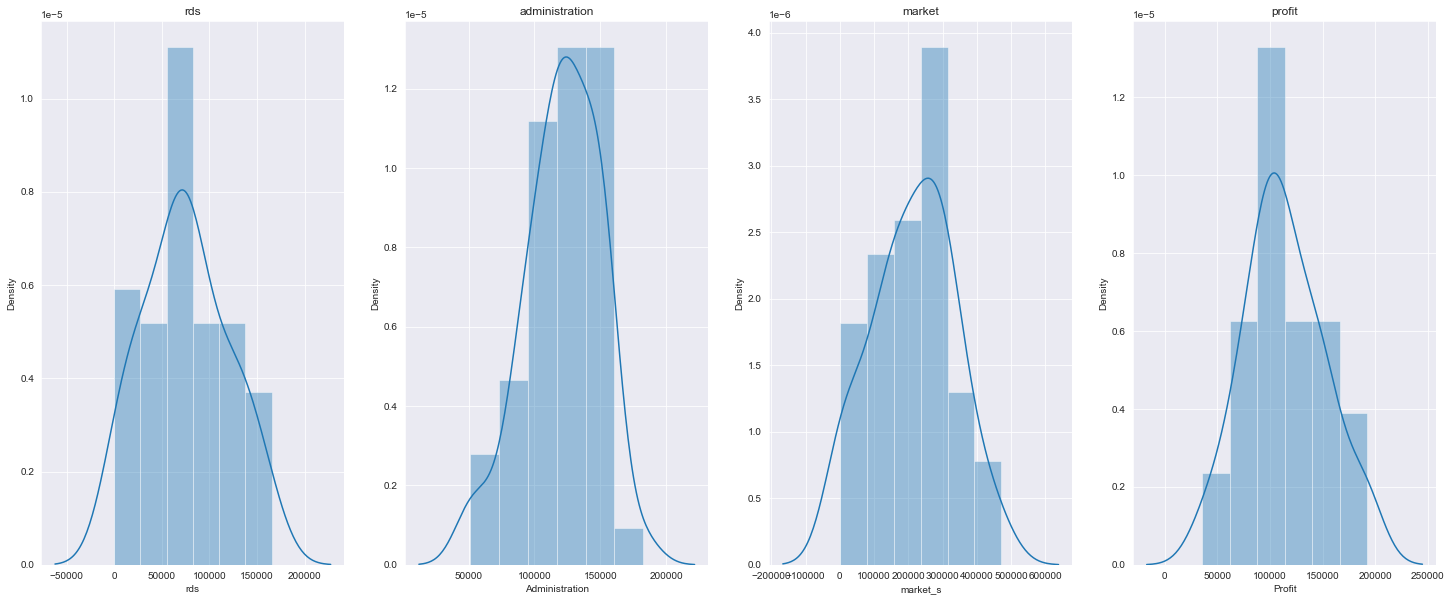

In [15]:
plt.subplots(figsize=(25,10))
plt.subplot(1,4,1)
plt.title('rds')
sns.distplot(data1.rds)
plt.subplot(1,4,2)
plt.title('administration')
sns.distplot(data1.Administration)
plt.subplot(1,4,3)
plt.title('market')
sns.distplot(data1.market_s)
plt.subplot(1,4,4)
plt.title('profit')
sns.distplot(data1.Profit)

In this administration is not following normal distribution. And remaining three following normal distribution(approximately). 

#### Transformations

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

Text(0.5, 1.0, 'square')

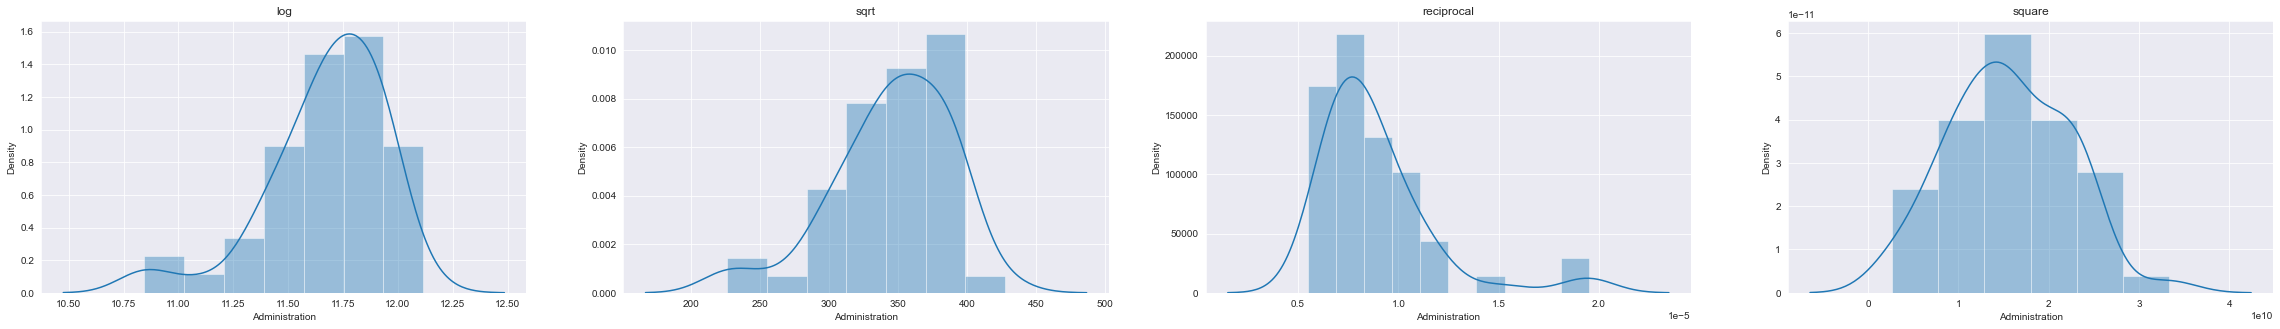

In [20]:
l = np.log(data1.Administration)
s = np.sqrt(data1.Administration)
r = np.reciprocal(data1.Administration)
sq = np.square(data1.Administration)
plt.subplots(figsize=(40,5))
plt.subplot(1,4,1)
sns.distplot(l)
plt.title('log')
plt.subplot(1,4,2)
sns.distplot(s)
plt.title('sqrt')
plt.subplot(1,4,3)
sns.distplot(r)
plt.title('reciprocal')
plt.subplot(1,4,4)
sns.distplot(sq)
plt.title('square')

By doing transformtions on administration. by doing the square of the data, the data following normal distribution.

In [27]:
data1.corr()

,rds,Administration,market_s,Profit
rds,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
market_s,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


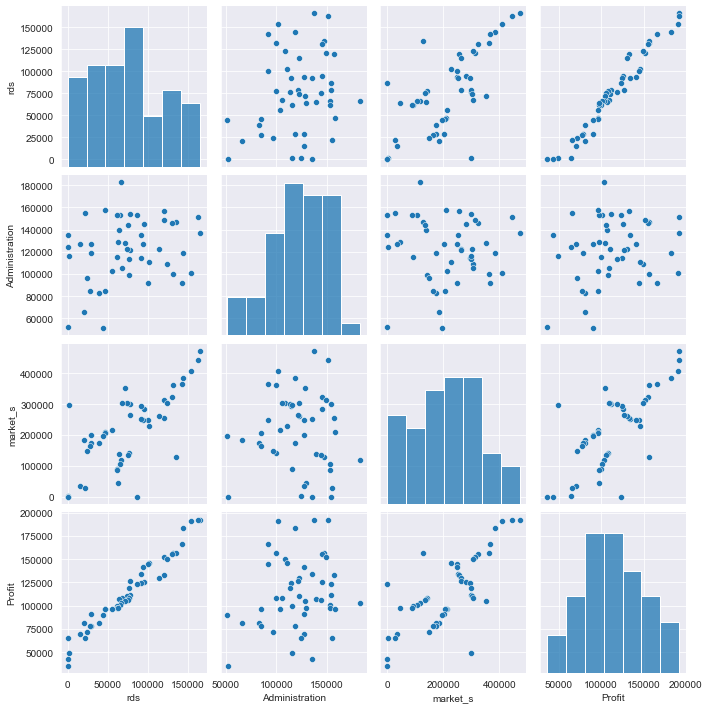

In [28]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

By seeing both correlation values and scatter plots "profit and R&D spend" following +ve, strong linear. And "profit and marketing spend" following +ve moderate linear. And "profit and administration" following +ve weak.

## Model building

In [29]:
model = smf.ols('Profit~rds+Administration+market_s',data = data1).fit()

In [30]:
model.params

Intercept         52382.439251
rds                   0.783002
Administration       -0.022201
market_s              0.025234
dtype: float64

In [31]:
model.tvalues, model.pvalues

(Intercept          9.450782
 rds               20.469501
 Administration    -0.517889
 market_s           1.825383
 dtype: float64,
 Intercept         2.960000e-12
 rds               1.971077e-24
 Administration    6.070728e-01
 market_s          7.458443e-02
 dtype: float64)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.85e-32
Time:                        15:18:38   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rds                0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
market_s           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here the R^2 value is 0.961. It is greater than 0.8. So the model is good model.

In [33]:
data2 = data1.copy()
data2.head()

,rds,Administration,market_s,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
data2.insert(5,'admin_square',sq)
data2.head()

,rds,Administration,market_s,State,Profit,admin_square
0,165349.20,136897.80,471784.10,New York,192261.83,1.874101e+10
1,162597.70,151377.59,443898.53,California,191792.06,2.291517e+10
2,153441.51,101145.55,407934.54,Florida,191050.39,1.023042e+10
3,144372.41,118671.85,383199.62,New York,182901.99,1.408301e+10
4,142107.34,91391.77,366168.42,Florida,166187.94,8.352456e+09


In [36]:
model1 = smf.ols('Profit~rds+admin_square+market_s',data = data2).fit()

In [39]:
model1.params

Intercept       5.179011e+04
rds             7.860178e-01
admin_square   -1.334119e-07
market_s        2.402775e-02
dtype: float64

In [37]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     374.9
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           7.80e-32
Time:                        15:21:30   Log-Likelihood:                -506.14
No. Observations:                  49   AIC:                             1020.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.179e+04   3636.116     14.243      0.000    4.45e+04    5.91e+04
rds              0.7860      0.038     20.600      0.000       0.709       0.863
admin_square -1.334e-07   1.84e-07     -0.723      0.473   -5.05e-07    2.38e-07
market_s         0.0240      0.014      1.724      0.092      -0.004       0.052
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.261
Skew:                          -0.096   Prob(JB):                        0.878
Kurtosis:                       2.698   Cond. No.                     5.54e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model prediction

###### with first model - "model"

In [64]:
new_data=pd.DataFrame({'rds':18000,'Administration':15000,'market_s':55000}, index=[0])

In [65]:
model.predict(new_data)

0    67531.3018
dtype: float64

In [67]:
profit = 52382.439251+(0.783002*18000)+(-0.022201*15000)+(0.025234*55000)
profit

67531.33025099999

In [70]:
preds = model.predict(data1)
preds

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

###### with second model - "model1"

In [62]:
new_data=pd.DataFrame({'rds':16000,'admin_square':13000,'market_s':45000}, index=[0])

In [57]:
model1.predict(new_data)

0    65447.63761
dtype: float64

In [68]:
profit1 = 5.179011e+04+(7.860178e-01*16000)+(-1.334119e-07*13000)+(2.402775e-02*45000)
profit1

65447.6418156453

In [72]:
preds1 = model1.predict(data2)
preds1

0     190593.155654
1     187203.516842
2     180834.751404
3     172597.972386
4     171172.889369
5     162837.257731
6     157778.297652
7     159163.251952
8     151075.323226
9     154485.788350
10    135770.053488
11    135796.792964
12    129409.092319
13    127719.433526
14    148961.517212
15    146091.761659
16    117488.815867
17    130173.955355
18    129253.659315
19    116573.466175
20    117173.444723
21    117452.943434
22    115227.960930
23    110702.799993
24    114410.752727
25    103334.442287
26    111449.203756
27    114772.977662
28    102096.071230
29    102807.127223
30    100924.444478
31     98853.192448
32    100510.250614
33     99149.582222
34     90029.213746
35     91931.093454
36     76999.250683
37     90813.176074
38     71562.201282
39     85383.942199
40     76668.552671
41     76708.945986
42     72694.045012
43     62666.917432
44     66705.816285
45     50565.644286
46     58173.566263
47     49343.272296
48     51858.976237
dtype: float64

### RMSE

In [74]:
# RMSE for the first model - "model"
np.sqrt(np.mean((data1.Profit - preds)**2))

7430.589093678348

In [75]:
# RMSE for the second model - "model1"
np.sqrt(np.mean((data2.Profit - preds1)**2))

7409.741631923549

In this data "profit" is output, and remaining "R&D spend", "Administration" and "market spend" are inputs. Then, checking the outliers in the data, only output varible "profit" have only one outlier. And i have removed outlier in "profit". And "Andministration" is not following normal distribution and remaining three follows normal distribution. And by building the model on it, which is named as "model". For that model "R^2" value is 0.961 and after doing predictions on the inputs "RMSE" value is 7430.589. Then by applying transformations which is square on Administration then it follows normal distribution. And then by building model on it which is named as "model1" "R^2" value is 0.962 and "RMSE" values 7409.471.

By seeing R^2 and RMSE values model1 is good model when compare to first model.